Task 3: Customer Churn Prediction (Bank Customers)

##Objective
To identify which customers are likely to leave the bank (churn) using classification models.

##Dataset Information
- Dataset Name:Churn Modelling Dataset
- Source:Kaggle
- Target Variable:`Exited`(0 = stayed, 1 = left the bank)
- Features:** CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
df = pd.read_csv(r'D:\pythin\Churn_Modelling.csv') 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##Understand the data

In [6]:
print("Shape:", df.shape)

Shape: (10000, 14)


In [7]:
print("Columns:", df.columns.tolist())

Columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


##Data Cleaning and Encoding 
- Removed unnecessary columns such as `RowNumber`, `CustomerId`, and `Surname`.
- Categorical features (`Geography`, `Gender`) were encoded using One-Hot Encoding.
- The resulting dataset was entirely numeric and ready for model training.
  

In [10]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)


##Encode the categorical features

In [11]:
df = pd.get_dummies(df, drop_first=True)

##Define features and targets

In [12]:
X = df.drop("Exited", axis=1)

In [13]:
y = df["Exited"]


##Split the dataset 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Train the model (Decision tree)
- Model Used:Decision Tree Classifier
- Train/Test Split:80/20 using `train_test_split`
- Library:scikit-learn

In [18]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [20]:
y_pred = model.predict(X_test)

##Evaluation
- Accuracy:Measured accuracy of predictions on the test set.
- Confusion Matrix:Helped analyze how well the model classified churn vs retention.
- Feature Importance:Identified most impactful features affecting churn.

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8535


In [22]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1563   44]
 [ 249  144]]


##Feature Importance 

In [23]:
importances = pd.Series(model.feature_importances_, index=X.columns)

<Axes: >

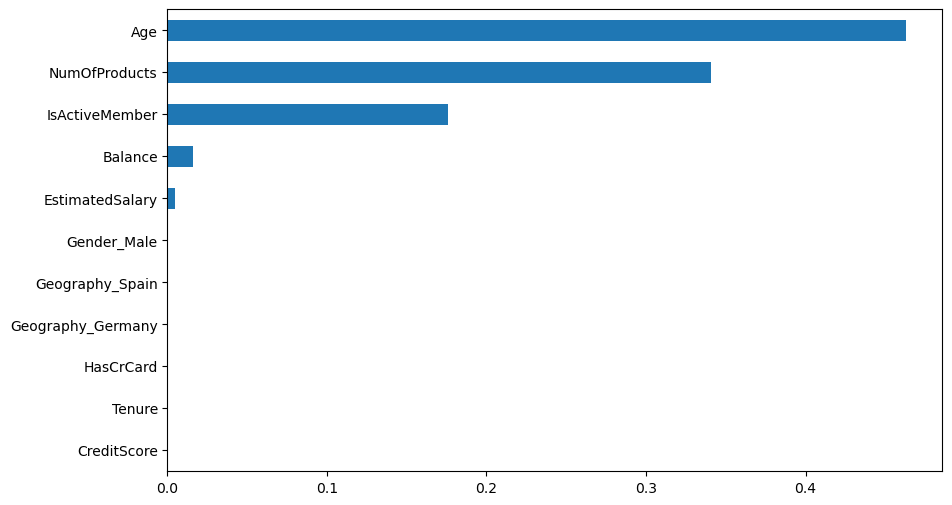

In [24]:
importances.sort_values().plot(kind='barh', figsize=(10,6))

Text(0.5, 1.0, 'Feature Importance')

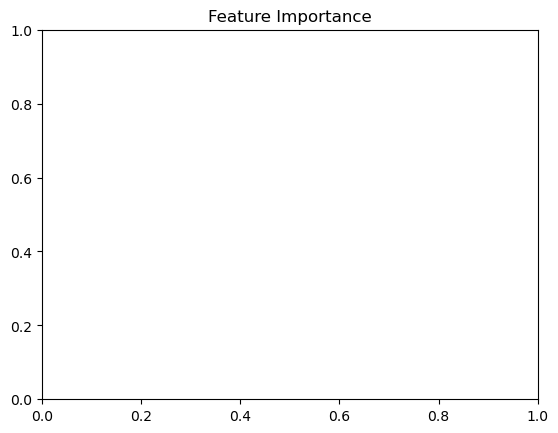

In [26]:
plt.title("Feature Importance")

In [27]:
plt.show()

##Results and Insights
- Decision Tree identified `Age`, `Balance`, and `Geography_Germany` as key predictors.
- Balanced accuracy and interpretability achieved using max_depth=4.
- Model can be improved with further tuning or advanced models (e.g., Random Forest or XGBoost).

##Conclusion
This task provided hands-on experience in:
- Encoding categorical data for modeling.
- Training and evaluating classification models.
- Extracting business insights from feature importance for customer retention strategies.